d:\softwares\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\softwares\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\softwares\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


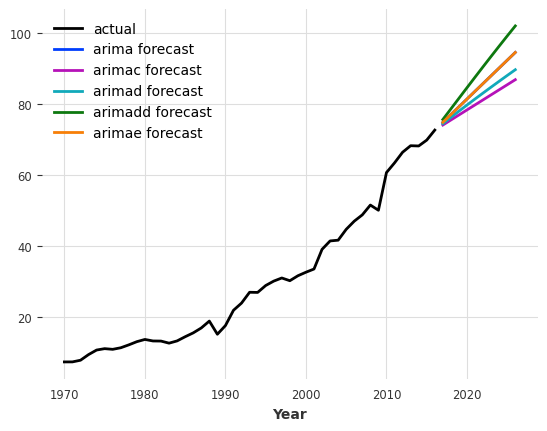

In [25]:
import pandas as pd
import darts
from darts.models import forecasting
df = pd.read_csv("aus_airpassengers.csv", index_col=0)
series = darts.TimeSeries.from_dataframe(df, "Year", "Passengers")

arima = forecasting.auto_arima.AutoARIMA()
model = arima.fit(series = series)
forecast = model.predict(10)
series.plot(label="actual")
forecast.plot(label="arima forecast")

arimac = forecasting.arima.ARIMA(p=0, d=1, q=0, trend='t')
modelc = arimac.fit(series = series)
forecastc = modelc.predict(10)
forecastc.plot(label="arimac forecast")

arimad = forecasting.arima.ARIMA(p=2, d=1, q=2, trend='t')
modeld = arimad.fit(series = series)
forecastd = modeld.predict(10)
forecastd.plot(label="arimad forecast")

arimadd = forecasting.arima.ARIMA(p=2, d=1, q=2)
modeldd = arimadd.fit(series = series)
forecastdd = modeldd.predict(10)
forecastdd.plot(label="arimadd forecast")

arimae = forecasting.arima.ARIMA(p=0, d=2, q=1, trend=None)
modele = arimae.fit(series = series)
forecaste = modele.predict(10)
forecaste.plot(label="arimae forecast")

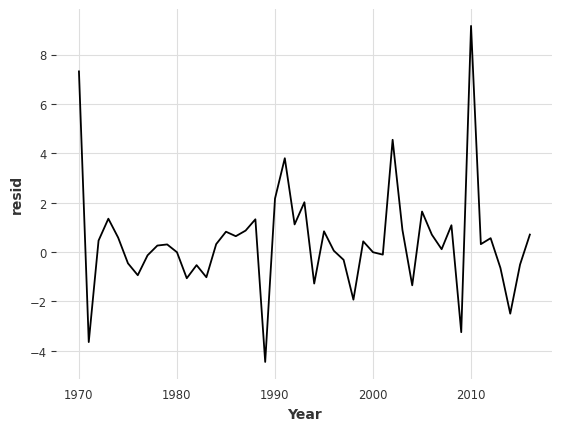

In [30]:
from matplotlib import pyplot as plt
res = model.model.model_.resid()
plt.xlabel('Year')
plt.ylabel('resid')
plt.plot(df['Year'], res)

In [ ]:
import pandas as pd
import darts
from darts.models import forecasting
df = pd.read_csv("aus_airpassengers.csv", index_col=0)
series = darts.TimeSeries.from_dataframe(df, "Year", "Passengers")


arima = forecasting.auto_arima.AutoARIMA()
model = arima.fit(series = series)
errs = model.residuals(series = series[:-10],forecast_horizon=10)

In [16]:
model.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 -97.019
Date:                Wed, 07 Dec 2022   AIC                            198.038
Time:                        21:13:45   BIC                            201.651
Sample:                             0   HQIC                           199.385
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8963      0.114     -7.842      0.000      -1.120      -0.672
sigma2         4.2120      0.420     10.023      0.000       3.388       5.036
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):               104.43
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):              20.02   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

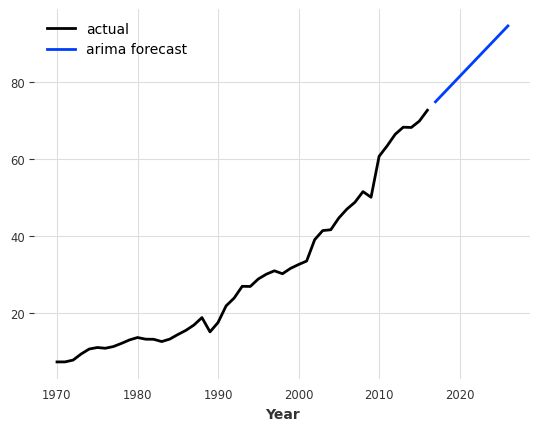

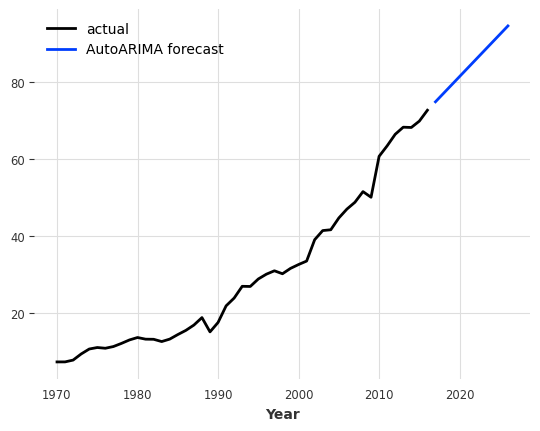

In [5]:
import pandas as pd
import darts
from darts.models import forecasting
df = pd.read_csv("aus_airpassengers.csv", index_col=0)
series = darts.TimeSeries.from_dataframe(df, "Year", "Passengers")

arima = forecasting.auto_arima.AutoARIMA()
model = arima.fit(series = series)
forecast = model.predict(10)
series.plot(label="actual")
forecast.plot(label="AutoARIMA forecast")



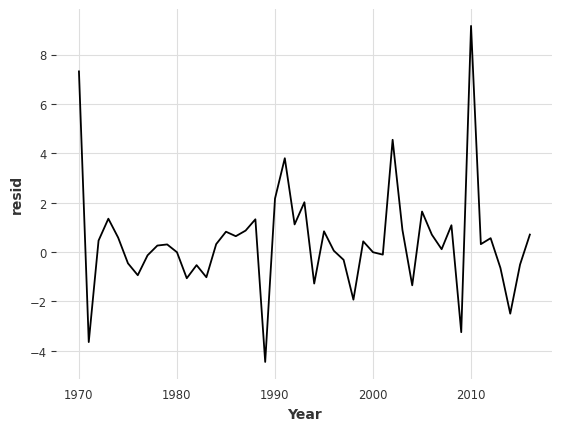

In [6]:
from matplotlib import pyplot as plt
res = model.model.model_.resid()
plt.xlabel('Year')
plt.ylabel('resid')
plt.plot(df['Year'], res)

In [2]:
model.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 -97.019
Date:                Fri, 09 Dec 2022   AIC                            198.038
Time:                        19:23:16   BIC                            201.651
Sample:                             0   HQIC                           199.385
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8963      0.114     -7.842      0.000      -1.120      -0.672
sigma2         4.2120      0.420     10.023      0.000       3.388       5.036
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):               104.43
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):              20.02   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljungbox_result = acorr_ljungbox(res, lags=20)  # 返回统计量和p值，lags为检验的延迟数

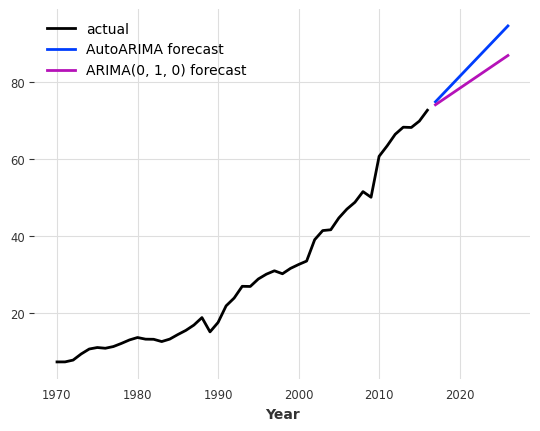

In [9]:
import pandas as pd
import darts
from darts.models import forecasting
df = pd.read_csv("aus_airpassengers.csv", index_col=0)
series = darts.TimeSeries.from_dataframe(df, "Year", "Passengers")

arima = forecasting.auto_arima.AutoARIMA()
model = arima.fit(series = series)
forecast = model.predict(10)
series.plot(label="actual")
forecast.plot(label="AutoARIMA forecast")

arimac = forecasting.arima.ARIMA(p=0, d=1, q=0, trend='t')
modelc = arimac.fit(series = series)
forecastc = modelc.predict(10)
forecastc.plot(label="ARIMA(0, 1, 0) forecast")

d:\softwares\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\softwares\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\softwares\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


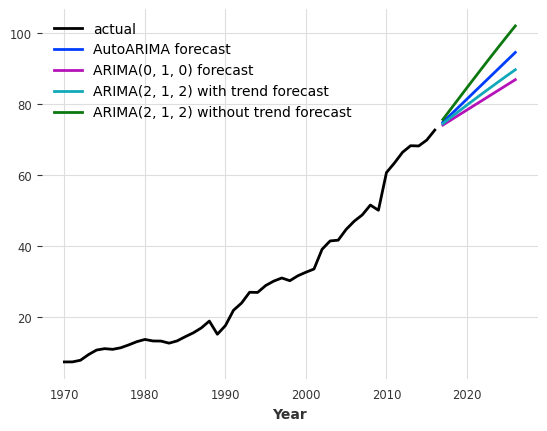

In [20]:
modelc.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -98.156
Date:                Fri, 09 Dec 2022   AIC                            200.311
Time:                        20:48:59   BIC                            203.969
Sample:                             0   HQIC                           201.681
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4191      0.367      3.866      0.000       0.700       2.139
sigma2         4.1777      0.489      8.552      0.000       3.220       5.135
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               129.55
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               6.63   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
arimae = forecasting.arima.ARIMA(p=0, d=2, q=1, trend='t')
modele = arimae.fit(series = series)
forecaste = modele.predict(10)
forecaste.plot(label="arimae forecast")

ValueError: In models with integration (`d > 0`) or seasonal integration (`D > 0`), trend terms of lower order than `d + D` cannot be (as they would be eliminated due to the differencing operation). For example, a constant cannot be included in an ARIMA(1, 1, 1) model, but including a linear trend, which would have the same effect as fitting a constant to the differenced data, is allowed.